<a href="https://colab.research.google.com/github/jihyunjeongme/data-analysis-kaggle/blob/master/Kaggle_Bike_sharing_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Bike Sharing Demand#
---

## Overview
Get started on this competition through Kaggle Scripts

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

Bikes

Acknowledgements
Kaggle is hosting this competition for the machine learning community to use for fun and practice. This dataset was provided by Hadi Fanaee Tork using data from Capital Bikeshare. We also thank the UCI machine learning repository for hosting the dataset. If you use the problem in publication, please cite:

Fanaee-T, Hadi, and Gama, Joao, Event labeling combining ensemble detectors and background knowledge, Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg.

---

## Data

See, fork, and run a random forest benchmark model through Kaggle Scripts

You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

Data Fields
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals

---

## 문제정의
### 1. Y 값 존재이 하는지 확인
존재함 -> Supervised Learning, Predictive

### 2. Y 값이 범주형/수치형 인지 확인
수치형 -> Prediction
### 3. X 값이 범주형/수치형 인지 확인
수치형 -> Regression, Forecasting, Decision Tree 
  
---

## Reference
- https://www.kaggle.com/c/bike-sharing-demand/data
- https://www.youtube.com/watch?v=Q_MbN-vu_2w



In [5]:
# test, traing set 데이터 불러오기

from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
cd /content/gdrive/My Drive/Colab Notebooks/dataanalysis/kaggle/bike-sharing-demand/

/content/gdrive/My Drive/Colab Notebooks/dataanalysis/kaggle/bike-sharing-demand


In [7]:
ls

sampleSubmission.csv  test.csv  train.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 실시간 그래프를 그리기 위해
%matplotlib inline

# # 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용
# plt.style.use('ggplot')

# # 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
# mpl.reParams['axes.unicode_minus'] = False


In [15]:
train = pd.read_csv("train.csv", encoding='utf-8')
train.shape

(10886, 12)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [17]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [18]:
# 기온에 집중해서 보기

train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [19]:
# null 데이터 확인

train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

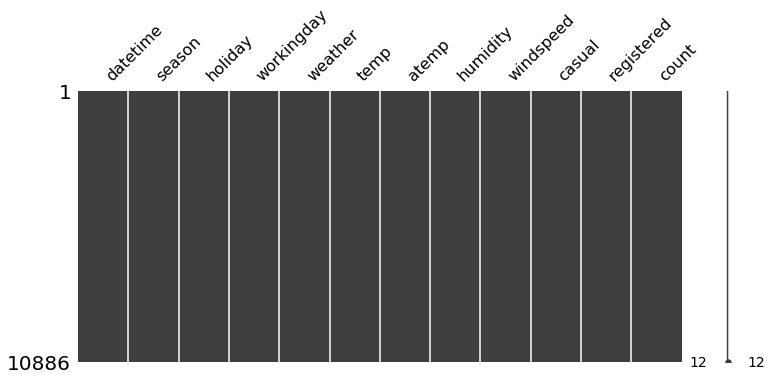

In [20]:
import missingno as msno

msno.matrix(train, figsize=(12,5))

In [0]:
train["year"]